In [1]:
import numpy as np  # a module for working with numerical array
import pandas as pd  # a module for working with data-frames
from matplotlib import pyplot as plt


In [2]:
data_path = "/Users/moshekagan/repos/personal_teaching/Zohar_Ben_Gurion_University/data/"

# Notice that the  encoding isn't ASCII, since hebrew isn't supported.
df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')

# removing unnecessary meta-data
df_2021 = df_2021_raw.drop('סמל ועדה', axis=1)
df_2021 = df_2021[df_2021.columns[5:]]
df_2021_raw.head()
df_2021.style.set_properties(**{'text-align': 'left'})
df_2021.head()


,אמת,ב,ג,ודעם,ז,זץ,ט,י,יז,ינ,...,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבירים,47,0,0,3,0,0,2,0,3,0,...,0,0,0,5,0,0,0,1,8,NaN
אדירים,1,7,4,0,0,0,9,0,1,0,...,0,0,0,2,0,0,0,61,6,NaN
אושה,72,7,0,3,0,0,0,0,2,0,...,0,0,0,1,0,0,0,0,15,NaN
אחווה,14,4,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,2,8,NaN
איבים,0,4,0,0,0,1,10,0,0,0,...,0,1,0,0,0,0,0,1,0,NaN


In [3]:
df_2021_raw.head()

,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,...,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46
שם ישוב,,,,,,,,,,,,,,,,,,,,,
אבירים,6,1220,221,151,1,150,47,0,0,3,...,0,0,0,5,0,0,0,1,8,NaN
אדירים,5,113,234,180,0,180,1,7,4,0,...,0,0,0,2,0,0,0,61,6,NaN
אושה,8,278,382,276,0,276,72,7,0,3,...,0,0,0,1,0,0,0,0,15,NaN
אחווה,17,1157,183,145,0,145,14,4,0,0,...,0,0,0,0,0,0,0,2,8,NaN
איבים,17,338,138,40,0,40,0,4,0,0,...,0,1,0,0,0,0,0,1,0,NaN


In [4]:
VOTERS = 'מצביעים'
CANCELED = 'פסולים'
KOSHER = 'כשרים'

In [5]:
df1 = df_2021_raw[[VOTERS, CANCELED]]
df1.head()

,מצביעים,פסולים
שם ישוב,,
אבירים,151,1
אדירים,180,0
אושה,276,0
אחווה,145,0
איבים,40,0


/var/folders/ww/9_9q5w917gz82h7km47r0s480000gn/T/ipykernel_11291/1194553071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["ratio"] = df1[CANCELED] / df1[VOTERS] * 100


[('סואעד חמרייה', 3.7735849056603774),
 ('ניין', 3.6486486486486487),
 ('מאיר שפיה', 3.4482758620689653)]

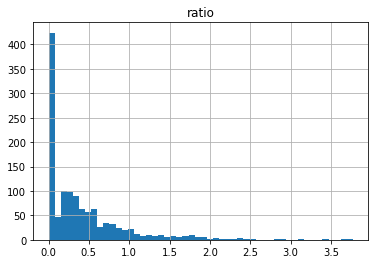

In [27]:
df1["ratio"] = df1[CANCELED] / df1[VOTERS] * 100
m = df1["ratio"].max() 
df1.hist("ratio", bins=50, range=(0,m))
top3 = df1.nlargest(3, "ratio")

res = []

for idx, name in enumerate(top3.index.values):
    res.append((name, top3.iloc[idx]["ratio"]))

res

In [7]:
df2 = df_2021_raw[(df_2021_raw[VOTERS] >= 5000) & (df_2021_raw[VOTERS] <= 50000)]
top2 = df2.nlargest(2, VOTERS)
top2

,סמל ועדה,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ב,ג,ודעם,...,קי,קך,קץ,ר,רנ,רף,רק,שס,ת,Unnamed: 46
שם ישוב,,,,,,,,,,,,,,,,,,,,,
מודיעיןמכביםרעות,12,1200,65214,48856,131,48725,4233,5881,191,38,...,2,0,3,172,22,5,0,806,3722,NaN
חדרה,9,6500,77744,45929,264,45665,2138,2632,432,66,...,5,2,5,244,12,9,0,3474,2766,NaN


<AxesSubplot:xlabel='party'>

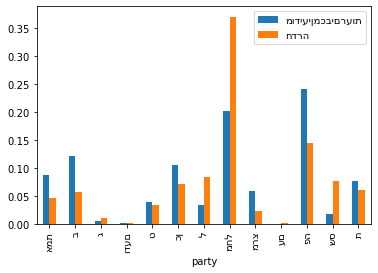

In [8]:
columns_to_plot = ["party"] + list(top2.index.values)
columns_to_plot

df_final = pd.DataFrame(columns=columns_to_plot)

total_voters_israel = df_2021_raw[KOSHER].sum()

for col in df_2021:
    if (df_2021[col].sum() / total_voters_israel) > 0.0325:
        first_city = top2.iloc[0][col] / top2.iloc[0][KOSHER]
        second_city = top2.iloc[1][col] / top2.iloc[1][KOSHER]
        df_final.loc[len(df_final)] = [col, first_city, second_city]
        
df_final.head()
df_final.plot.bar(x="party")